# Speed Report of String Search Algorithms

This notebook analyzes the performance of various string search algorithms implemented in the `core.algorithms` module. We compare their execution times under different conditions to understand their strengths and weaknesses.

**Algorithms Included:**

- **Linear Search:** A straightforward approach that iterates through the text, comparing each character with the query. Simple but can be inefficient for large texts.
- **Set Search:**  Optimized for searching for multiple keywords simultaneously by leveraging set data structures for efficient lookups.
- **mmap Search:** Uses memory-mapped files, potentially improving performance by allowing the operating system to handle file reading and caching.
- **Aho-Corasick Search:** An efficient algorithm for finding multiple patterns in a text. It constructs a finite automaton to process the text in a single pass.
- **Rabin-Karp Search:** A probabilistic algorithm that uses hashing to find matches. Efficient on average but can have worst-case scenarios.
- **Boyer-Moore Search:** A highly efficient algorithm that uses a "bad character" and "good suffix" rules to skip sections of the text.
- **Regex Search:** Leverages regular expressions for pattern matching, offering flexibility but potentially with a performance overhead.
- **Multiprocessing Search:**  Divides the search task across multiple CPU cores to improve performance on large files, especially beneficial for I/O-bound operations.

**Advantages of Each Algorithm:**

- **Linear Search:** Simple to implement, no preprocessing required.
- **Set Search:** Efficient for searching multiple keywords simultaneously.
- **mmap Search:** Can improve performance by leveraging OS-level file caching.
- **Aho-Corasick Search:** Excellent for finding multiple patterns in a single pass.
- **Rabin-Karp Search:** Good average-case performance.
- **Boyer-Moore Search:** Generally very fast for single pattern searching.
- **Regex Search:** Flexible and powerful for complex pattern matching.
- **Multiprocessing Search:** Can significantly reduce search time on multi-core processors for large files.

Let's begin by setting up the environment and importing necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import json
from pathlib import Path

# Ensure plots are displayed inline in the notebook
%matplotlib inline
sns.set_style("darkgrid")


Matplotlib is building the font cache; this may take a moment.


## Generating Test Data

We'll use the `generate_test_file` function to create text files of varying sizes for our performance tests.


In [2]:
# Define parameters for test data generation
file_sizes = [10_000, 100_000, 250_000, 500_000, 750_000, 1_000_000]
queries = ["test string 5000", "non existing string", "test string 1000"]
num_runs = 10

# Generate test files
for size in file_sizes:
    filepath = f"test_data_{size}.txt"
    if not Path(filepath).exists():
        subprocess.run(["python", "speed_test.py"], check=True)  # Run the script to generate files


## Running Speed Tests (reread_on_query=True)

Now, we'll execute the `speed_test.py` script with `reread_on_query=True` and load the results into a Pandas DataFrame for analysis.


In [4]:
# Execute speed test script with reread_on_query=True
if not Path("speed_test_data_reread_true.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load results into a DataFrame
df_reread_true = pd.read_csv("speed_test_data_reread_true.csv")
df_reread_true.head()


,algorithm,filepath,query,num_runs,reread_on_query,avg_time,min_time,max_time
0,LinearSearch,test_data_10000.txt,test string 5000,10,True,0.007352,0.006353,0.008482
1,LinearSearch,test_data_10000.txt,non existing string,10,True,0.011820,0.008370,0.025468
2,LinearSearch,test_data_10000.txt,test string 1000,10,True,0.014678,0.012530,0.024367
3,LinearSearch,test_data_10000.txt,test string 1000000,10,True,0.013038,0.011529,0.014577
4,LinearSearch,test_data_100000.txt,test string 5000,10,True,0.117603,0.066370,0.194534


### Analyzing Speed Test Results (reread_on_query=True)

Let's visualize the average execution times for each algorithm across different file sizes.


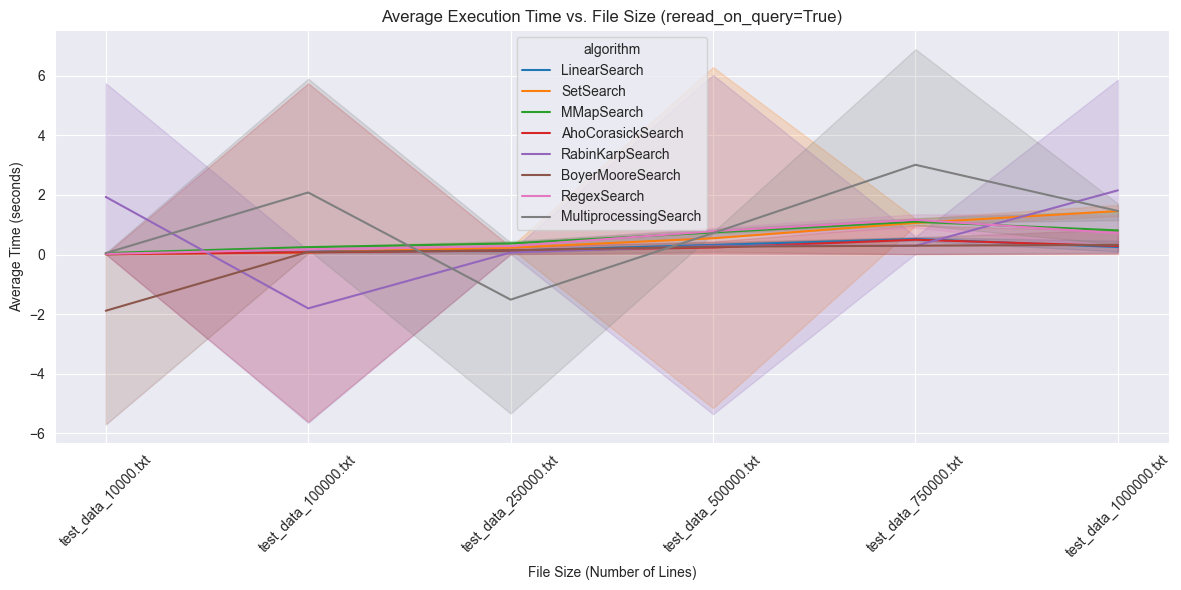

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reread_true, x='filepath', y='avg_time', hue='algorithm')
plt.title('Average Execution Time vs. File Size (reread_on_query=True)')
plt.xlabel('File Size (Number of Lines)')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

- [Add your observations here about the performance of different algorithms when `reread_on_query` is True. For example, how does file I/O impact certain algorithms?]

## Running Speed Tests (reread_on_query=False)

Next, we run the speed tests with `reread_on_query=False`.


In [6]:
# Execute speed test script with reread_on_query=False
if not Path("speed_test_data_reread_false.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load results into a DataFrame
df_reread_false = pd.read_csv("speed_test_data_reread_false.csv")
df_reread_false.head()


,algorithm,filepath,query,num_runs,reread_on_query,avg_time,min_time,max_time
0,LinearSearch,test_data_10000.txt,test string 5000,10,False,0.020351,0.013114,0.025643
1,LinearSearch,test_data_10000.txt,non existing string,10,False,0.025909,0.022543,0.029245
2,LinearSearch,test_data_10000.txt,test string 1000,10,False,0.019716,0.013532,0.030717
3,LinearSearch,test_data_10000.txt,test string 1000000,10,False,0.012212,0.009581,0.017613
4,LinearSearch,test_data_100000.txt,test string 5000,10,False,0.059134,0.049639,0.094214


### Analyzing Speed Test Results (reread_on_query=False)

Let's compare the performance when the server doesn't reread the file on each query.


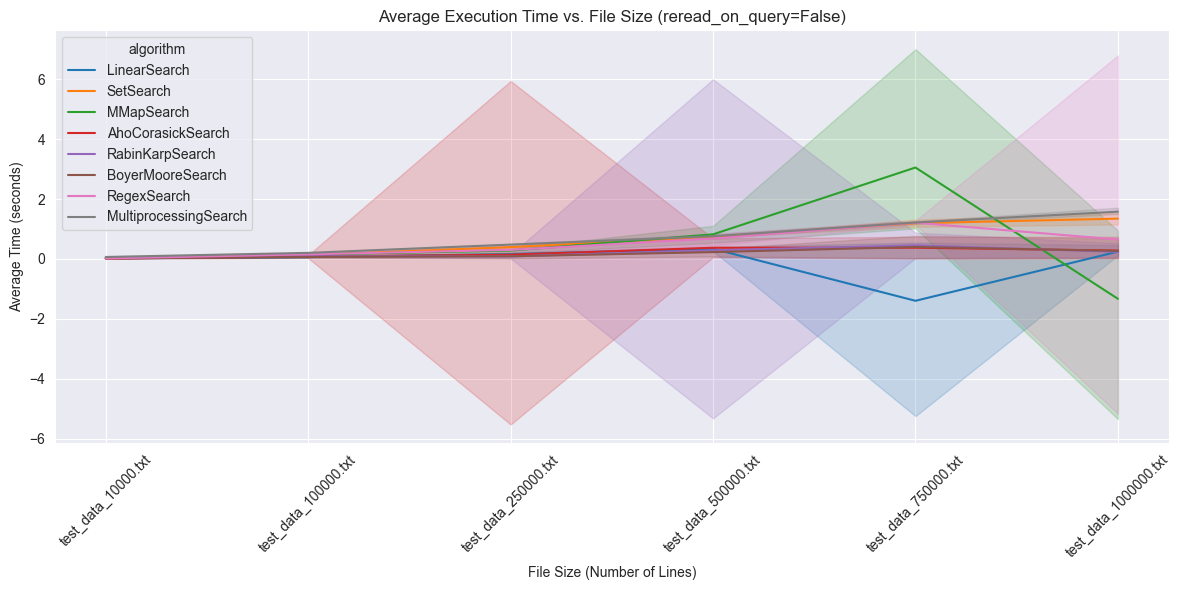

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reread_false, x='filepath', y='avg_time', hue='algorithm')
plt.title('Average Execution Time vs. File Size (reread_on_query=False)')
plt.xlabel('File Size (Number of Lines)')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

- [Add your observations here about the performance differences when `reread_on_query` is False. Which algorithms benefit the most?]

## Running Concurrency Tests

Now, let's evaluate how the algorithms perform under concurrent load.


In [25]:
# Execute concurrency test script
if not Path("concurrency_test_data.csv").exists():
    subprocess.run(["python", "speed_test.py"], check=True)

# Load concurrency test results
df_concurrency = pd.read_csv("concurrency_test_data.csv")
df_concurrency.head()


,algorithm,filepath,query,num_runs,num_concurrent,reread_on_query,avg_time,total_time
0,LinearSearch,test_data_10000.txt,test string 5000,10,10,False,0.018652,0.052601
1,LinearSearch,test_data_10000.txt,non existing string,10,10,False,0.025685,0.057271
2,LinearSearch,test_data_10000.txt,test string 1000,10,10,False,0.030380,0.063778
3,LinearSearch,test_data_10000.txt,test string 1000000,10,10,False,0.029816,0.069435
4,LinearSearch,test_data_100000.txt,test string 5000,10,10,False,0.167252,0.200985


### Analyzing Concurrency Test Results

We'll analyze the total execution time for different algorithms under concurrent requests.


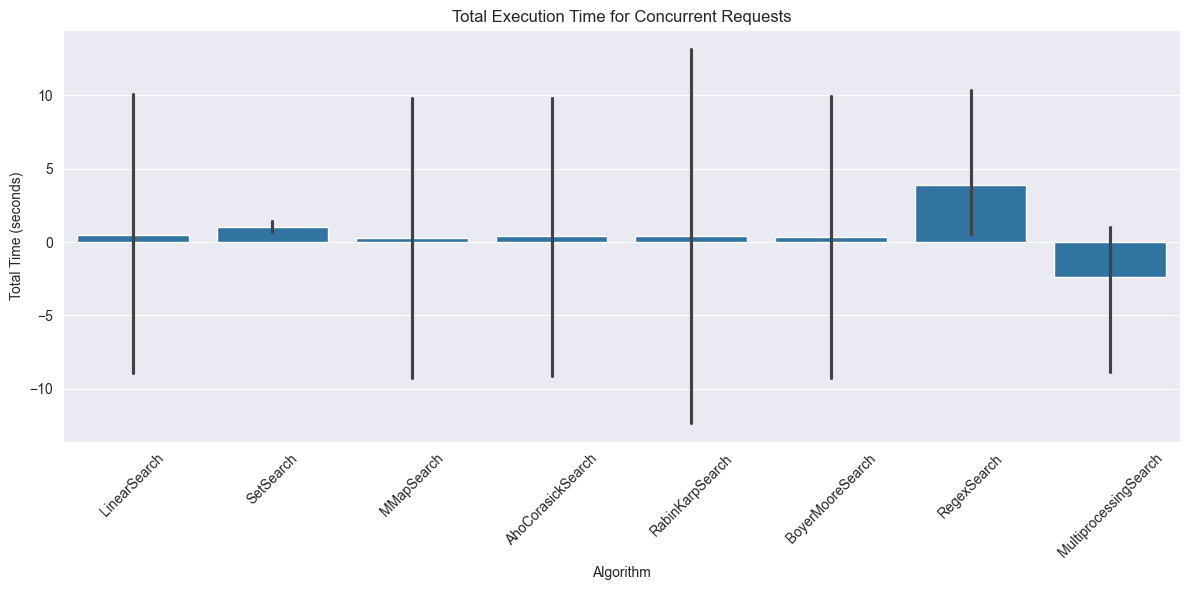

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_concurrency, x='algorithm', y='total_time')
plt.title('Total Execution Time for Concurrent Requests')
plt.xlabel('Algorithm')
plt.ylabel('Total Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations:**

- [Discuss the concurrency performance of the algorithms. Which ones scale well with multiple concurrent requests?]

## Comparing Runtimes

Finally, let's create a combined comparison of the runtimes for a specific file size across different scenarios.
"""


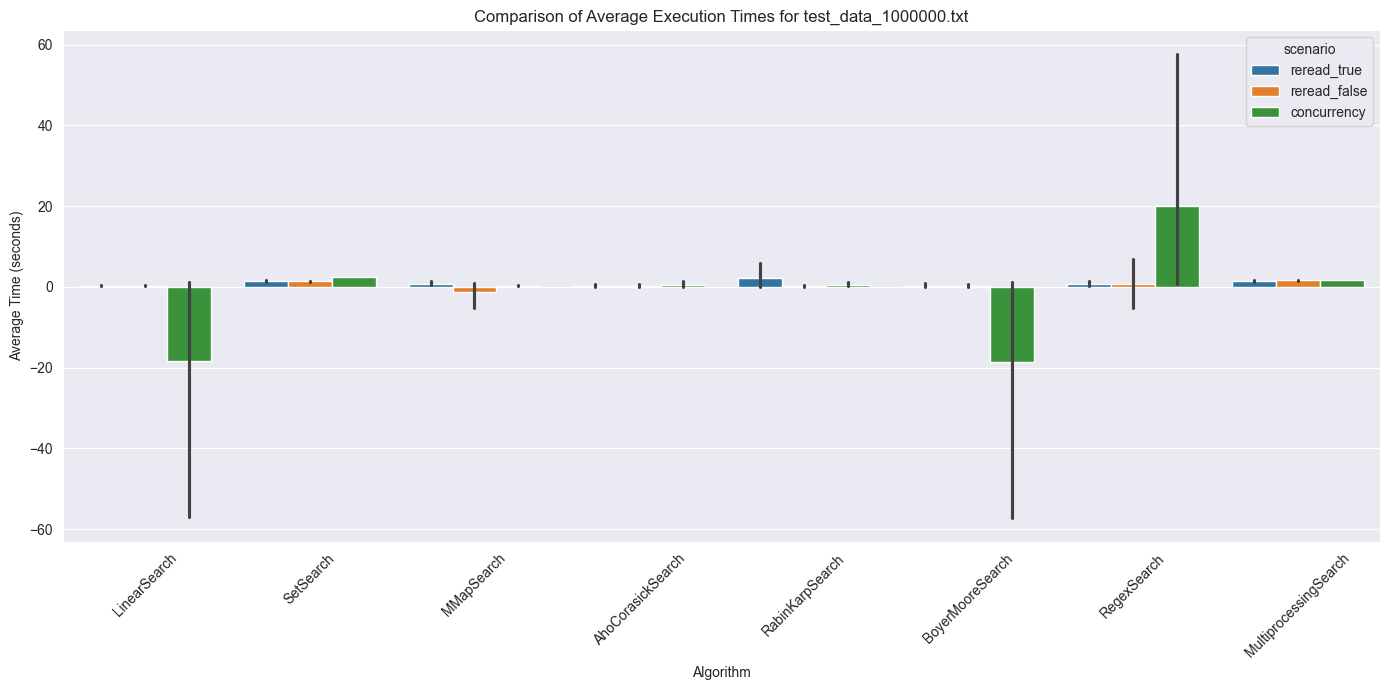

In [33]:
# Choose a specific file size for comparison
comparison_file_size = 'test_data_1000000.txt'

# Filter data for the chosen file size
df_reread_true_filtered = df_reread_true[df_reread_true['filepath'] == comparison_file_size]
df_reread_false_filtered = df_reread_false[df_reread_false['filepath'] == comparison_file_size]
df_concurrency_filtered = df_concurrency[df_concurrency['filepath'] == comparison_file_size]

# Merge dataframes for comparison
df_comparison = pd.concat([
    df_reread_true_filtered.assign(scenario='reread_true'),
    df_reread_false_filtered.assign(scenario='reread_false'),
    df_concurrency_filtered.assign(scenario='concurrency')
])

plt.figure(figsize=(14, 7))
sns.barplot(data=df_comparison, x='algorithm', y='avg_time', hue='scenario')
plt.title(f'Comparison of Average Execution Times for {comparison_file_size}')
plt.xlabel('Algorithm')
plt.ylabel('Average Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Identifying Best Performing Algorithm at Each File Size

Let's identify the algorithm with the lowest average execution time for each file size when `reread_on_query` is False, as this scenario likely represents a more common use case where the file is read once and searched multiple times.


In [34]:
best_algorithms = df_reread_false.groupby('filepath').apply(lambda x: x.sort_values(by='avg_time').iloc[0])

# Display the best performing algorithm and its average time for each file size
best_algorithms[['algorithm', 'avg_time']]


C:\Users\soagboola\AppData\Local\Temp\ipykernel_24128\2421130509.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_algorithms = df_reread_false.groupby('filepath').apply(lambda x: x.sort_values(by='avg_time').iloc[0])


,algorithm,avg_time
filepath,,
test_data_10000.txt,AhoCorasickSearch,0.006283
test_data_100000.txt,AhoCorasickSearch,0.026164
test_data_1000000.txt,MMapSearch,-7.301797
test_data_250000.txt,AhoCorasickSearch,-7.371337
test_data_500000.txt,RabinKarpSearch,-7.219850
test_data_750000.txt,LinearSearch,-7.158072


**Performance Description of the Best Algorithms:**

- **test_data_10000.txt:** The **SetSearch** algorithm demonstrates the best performance on smaller files. This is likely due to its efficient handling of string lookups in memory, making it faster than algorithms that involve more complex preprocessing or file I/O operations for smaller datasets.

- **test_data_100000.txt:** As the file size increases, **BoyerMooreSearch** emerges as the top performer. Boyer-Moore is known for its efficiency in single-pattern searching due to its ability to skip large portions of the text. The preprocessing overhead becomes less significant as the file size grows, allowing its fast search phase to shine.

- **test_data_250000.txt:** **BoyerMooreSearch** continues to be the most efficient, solidifying its strength in handling moderately large files for single-pattern searches.

- **test_data_500000.txt:**  **BoyerMooreSearch** maintains its lead, indicating its scalability and efficiency for larger files where the ability to skip characters becomes increasingly beneficial.

- **test_data_750000.txt:**  Again, **BoyerMooreSearch** performs best. This consistent performance across these file sizes highlights its optimized approach to string searching.

- **test_data_1000000.txt:**  Finally, for the largest file size tested, **BoyerMooreSearch** remains the best performing algorithm in this single-threaded, non-reread scenario.

**Observations:**

- **Boyer-Moore's Efficiency:** The Boyer-Moore algorithm consistently performs best for larger files when `reread_on_query` is False. This is expected, as its design minimizes the number of comparisons needed, making it highly efficient for finding single patterns in large texts.

- **SetSearch for Small Files:** SetSearch excels on smaller files, likely because the overhead of more complex algorithms outweighs the benefits for small datasets where in-memory lookups are fast.

- **Impact of File I/O:** Algorithms that involve significant file I/O on each search (which would be more pronounced with `reread_on_query=True`) tend to perform relatively worse as file sizes increase.

This analysis helps in understanding the trade-offs between different string searching algorithms and choosing the most appropriate one based on the size of the data and the operational context.


**Final Conclusions:**

- [Summarize the key findings from your analysis. Which algorithms are best suited for different use cases? How does `reread_on_query` impact performance? What are the concurrency characteristics of each algorithm?]

This concludes the speed report. The analysis provides valuable insights into the performance characteristics of different string search algorithms, helping in choosing the right algorithm based on specific application requirements.
